In [22]:

import numpy as np
import tensorflow as tf
from tensorflow import keras

In [23]:
from tensorflow.keras.layers import TextVectorization
training_data = np.array([["This is the 1st sample."], ["And here's the 2nd sample."]])
vectorizer = TextVectorization(output_mode="int")
vectorizer.adapt(training_data)
integer_data = vectorizer(training_data)
print(integer_data)

tf.Tensor(
[[4 5 2 9 3]
 [7 6 2 8 3]], shape=(2, 5), dtype=int64)


In [24]:
from tensorflow.keras.layers import TextVectorization
training_data = np.array([["This is the 1st sample."], ["And here's the 2nd sample."]])
vectorizer = TextVectorization(output_mode="binary", ngrams=2)
vectorizer.adapt(training_data)
integer_data = vectorizer(training_data)
print(integer_data)

tf.Tensor(
[[0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0.]], shape=(2, 17), dtype=float32)


In [25]:
from tensorflow.keras.layers import Normalization
training_data = np.random.randint(0, 256, size=(64, 200, 200, 3)).astype("float32")
normalizer = Normalization(axis=-1)
normalizer.adapt(training_data)

normalized_data = normalizer(training_data)
print("var: %.4f" % np.var(normalized_data))
print("mean: %.4f" % np.mean(normalized_data))

var: 1.0007
mean: -0.0000


In [26]:
from tensorflow.keras.layers import CenterCrop
from tensorflow.keras.layers import Rescaling

# Example image data, with values in the [0, 255] range
training_data = np.random.randint(0, 256, size=(64, 200, 200, 3)).astype("float32")

cropper = CenterCrop(height=150, width=150)
scaler = Rescaling(scale=1.0 / 255)

output_data = scaler(cropper(training_data))
print("shape:", output_data.shape)
print("min:", np.min(output_data))
print("max:", np.max(output_data))

shape: (64, 150, 150, 3)
min: 0.0
max: 1.0


In [27]:
inputs = keras.Input(shape=(None, None, 3))

In [28]:

from tensorflow.keras import layers
x = CenterCrop(height=150, width=150)(inputs)
x = Rescaling(scale=1.0 / 255)(x)

x = layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(3, 3))(x)
x = layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(3, 3))(x)
x = layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu")(x)
x = layers.GlobalAveragePooling2D()(x)
num_classes = 10
outputs = layers.Dense(num_classes, activation="softmax")(x)

In [29]:
model = keras.Model(inputs=inputs, outputs=outputs)
data = np.random.randint(0, 256, size=(64, 200, 200, 3)).astype("float32")
processed_data = model(data)
print(processed_data.shape)

(64, 10)


In [30]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
center_crop_1 (CenterCrop)   (None, 150, 150, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0     

In [40]:
import numpy as np
from random import  randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [36]:
train_labels=[]
train_samples=[]

In [41]:
for i in range(50):
    random_younger= randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1) 
    random_older= randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    random_younger= randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    random_older= randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [42]:
train_labels=np.array(train_labels)
train_samples=np.array(train_samples)
train_labels,train_samples=shuffle(train_labels,train_samples)

In [43]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [44]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Conv2D
from tensorflow.keras.optimizers import Adam

#for training
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [45]:

model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [46]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [48]:
model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=30, verbose=2)

Epoch 1/30
210/210 - 0s - loss: 0.6916 - accuracy: 0.6376
Epoch 2/30
210/210 - 0s - loss: 0.6596 - accuracy: 0.7710
Epoch 3/30
210/210 - 0s - loss: 0.6276 - accuracy: 0.8190
Epoch 4/30
210/210 - 0s - loss: 0.5967 - accuracy: 0.8490
Epoch 5/30
210/210 - 0s - loss: 0.5653 - accuracy: 0.8443
Epoch 6/30
210/210 - 0s - loss: 0.5331 - accuracy: 0.8543
Epoch 7/30
210/210 - 0s - loss: 0.5015 - accuracy: 0.8686
Epoch 8/30
210/210 - 0s - loss: 0.4711 - accuracy: 0.8767
Epoch 9/30
210/210 - 0s - loss: 0.4408 - accuracy: 0.8871
Epoch 10/30
210/210 - 0s - loss: 0.4101 - accuracy: 0.8981
Epoch 11/30
210/210 - 0s - loss: 0.3862 - accuracy: 0.9057
Epoch 12/30
210/210 - 0s - loss: 0.3663 - accuracy: 0.9090
Epoch 13/30
210/210 - 0s - loss: 0.3492 - accuracy: 0.9124
Epoch 14/30
210/210 - 0s - loss: 0.3349 - accuracy: 0.9152
Epoch 15/30
210/210 - 0s - loss: 0.3224 - accuracy: 0.9181
Epoch 16/30
210/210 - 0s - loss: 0.3121 - accuracy: 0.9205
Epoch 17/30
210/210 - 0s - loss: 0.3034 - accuracy: 0.9210
Epoch 

In [49]:

model.fit(
      x=scaled_train_samples
    , y=train_labels
    , validation_split=0.1
    , batch_size=10
    , epochs=30
    , verbose=2
)


Epoch 1/30
189/189 - 0s - loss: 0.2538 - accuracy: 0.9317 - val_loss: 0.2826 - val_accuracy: 0.9333
Epoch 2/30
189/189 - 0s - loss: 0.2526 - accuracy: 0.9333 - val_loss: 0.2818 - val_accuracy: 0.9333
Epoch 3/30
189/189 - 0s - loss: 0.2515 - accuracy: 0.9333 - val_loss: 0.2810 - val_accuracy: 0.9333
Epoch 4/30
189/189 - 0s - loss: 0.2506 - accuracy: 0.9333 - val_loss: 0.2804 - val_accuracy: 0.9333
Epoch 5/30
189/189 - 0s - loss: 0.2497 - accuracy: 0.9328 - val_loss: 0.2799 - val_accuracy: 0.9333
Epoch 6/30
189/189 - 0s - loss: 0.2487 - accuracy: 0.9317 - val_loss: 0.2797 - val_accuracy: 0.9429
Epoch 7/30
189/189 - 0s - loss: 0.2480 - accuracy: 0.9344 - val_loss: 0.2786 - val_accuracy: 0.9333
Epoch 8/30
189/189 - 0s - loss: 0.2473 - accuracy: 0.9339 - val_loss: 0.2781 - val_accuracy: 0.9333
Epoch 9/30
189/189 - 0s - loss: 0.2466 - accuracy: 0.9333 - val_loss: 0.2777 - val_accuracy: 0.9333
Epoch 10/30
189/189 - 0s - loss: 0.2458 - accuracy: 0.9381 - val_loss: 0.2770 - val_accuracy: 0.9333

In [50]:
test_lables=[]
test_samples=[]

In [51]:
for i in range(10):
    #     younger individuals who did experience side effects
    random_younger=randint(13,64)
    test_samples.append(random_younger)
    test_lables.append(1)
    
      #     older individuals who did not experience side effects
    random_older=randint(65,100)
    test_samples.append(random_older)
    test_lables.append(0)
    
for i in range(200):
    #     younger individuals who did not experience side effects
    random_younger=randint(13,64)
    test_samples.append(random_younger)
    test_lables.append(0)
    
      #     older individuals who did experience side effects
    random_older=randint(65,100)
    test_samples.append(random_older)
    test_lables.append(1)

In [52]:
test_lables=np.array(test_lables)
test_samples=np.array(test_samples)

# Shuffle 
test_lables, test_samples = shuffle(test_lables, test_samples)

# tranform to 2D 
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [53]:
predictions = model.predict(
      x=scaled_test_samples
    , batch_size=10
    , verbose=0
)

In [54]:
rounded_predictions=np.argmax(predictions, axis=-1)

In [55]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [56]:
cm = confusion_matrix(y_true=test_lables, y_pred=rounded_predictions)
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [57]:
cm_plot_labels = ['no_side_effects','had_side_effects']


Confusion matrix, without normalization
[[191  19]
 [  9 201]]


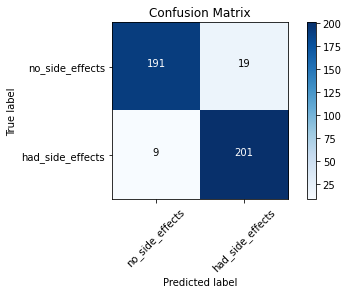

In [58]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')


In [59]:
json_string = model.to_json()
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_1_input"}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_2", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bi

In [60]:
from tensorflow.keras.models import model_from_json
model_architecture=model_from_json(json_string)

In [61]:
model_architecture.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________
